Project to predict housing price , based on Regression task .
We try to build deep learning model who predict price.
*Big part of this project have :-
1) Feature Engineering
2) Exploratory data analysis

Let's Start Part 1 :- Feature Engineering & Exploratory data analysis

Step 1 :- import library and import data fle and see basic details of data.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('../TensorFlow_FILES/TensorFlow_FILES/DATA/kc_house_data.csv')

In [70]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [72]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [73]:
df[df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [74]:
df[df['bathrooms']==8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


Most important to check there is missing data or not ?
Step 2 :- Clean Data { null ,}

In [76]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
df.isnull().sum()   #important logic for how much data is missing, to check null data in large dataset. false treat as 0 and true as 1.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Step 3 :- Visualize the data

A) let's see distribution of label.

<Figure size 1000x600 with 0 Axes>

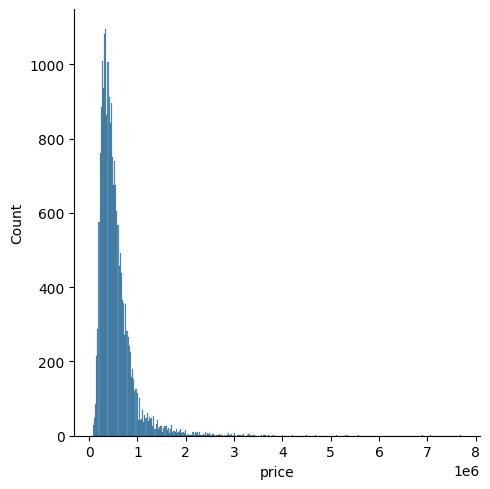

In [80]:
plt.figure(figsize=(10,6))
sns.displot(df,x='price')

looks like most of houses lies in between 0 and 1.5 milion , so we can drop out the houses who more than costly they are few.

B) let's do similar analysis on features ...

a) bedrooms are integer so we can create count plot to see which most no of bedrooms and so on

<Axes: xlabel='bedrooms', ylabel='count'>

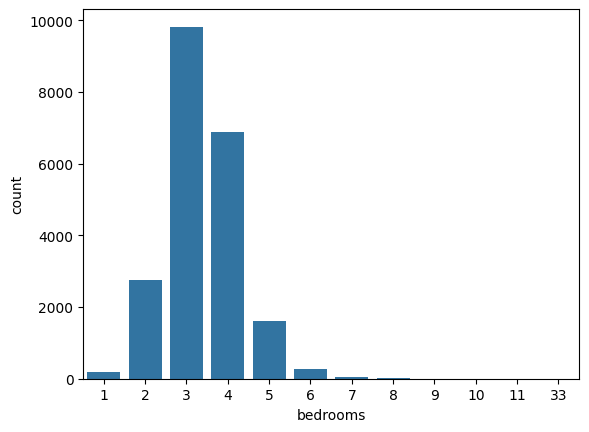

In [84]:
sns.countplot(data=df,x='bedrooms')

b) let's see correlations between label and features 

In [86]:
df.drop('date',axis=1).corr() #it's difficult to analysis , so let's search only for lebal and also sort the result.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [87]:
df.drop('date',axis=1).corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

Recoomendation :- explore correlation from scatter plot.

<Axes: xlabel='price', ylabel='sqft_living'>

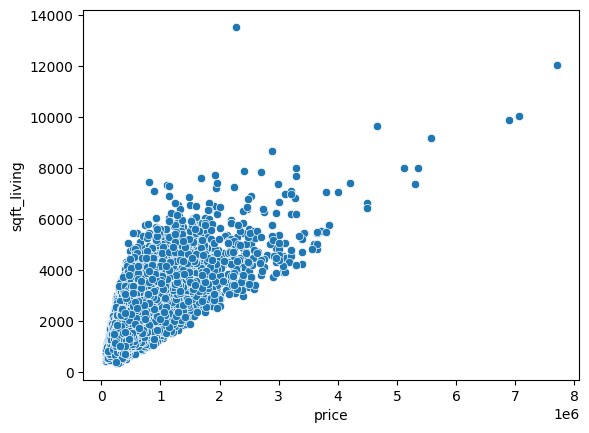

In [89]:
sns.scatterplot(data=df,x='price',y='sqft_living')

we can see strong relationship between them i.e. linear relation.

<Axes: xlabel='price', ylabel='bathrooms'>

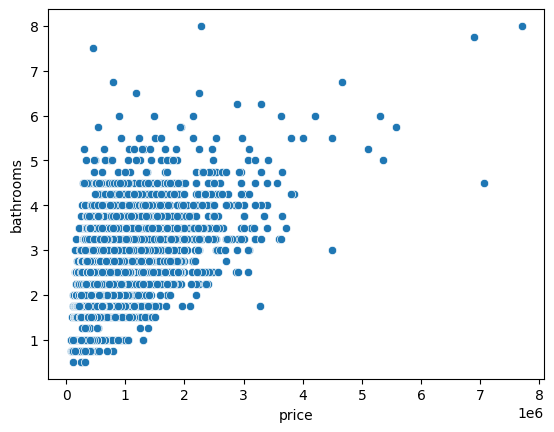

In [91]:
sns.scatterplot(data=df,x='price',y='bathrooms')

<Axes: xlabel='price', ylabel='bedrooms'>

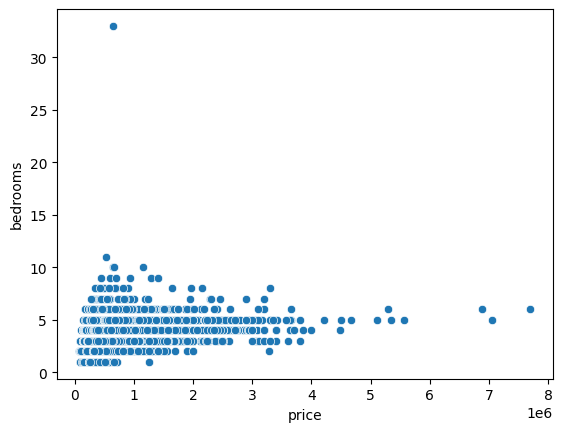

In [92]:
sns.scatterplot(data=df,x='price',y='bedrooms')

we can use box plot to see distribution ...

<Axes: xlabel='bedrooms', ylabel='price'>

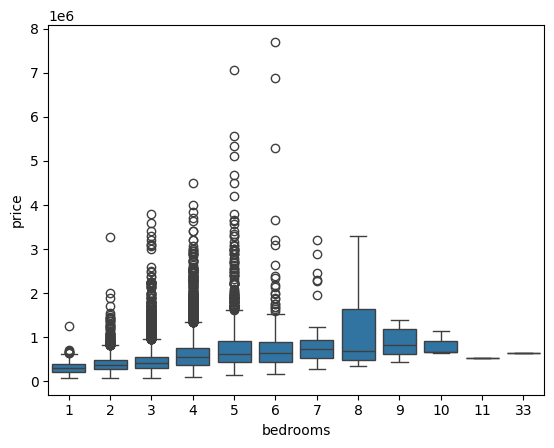

In [94]:
sns.boxplot(data=df,x='bedrooms',y='price')

C) let's see interesting data like longitude and lattitude effect on ourlabel.

In [96]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='price', ylabel='long'>

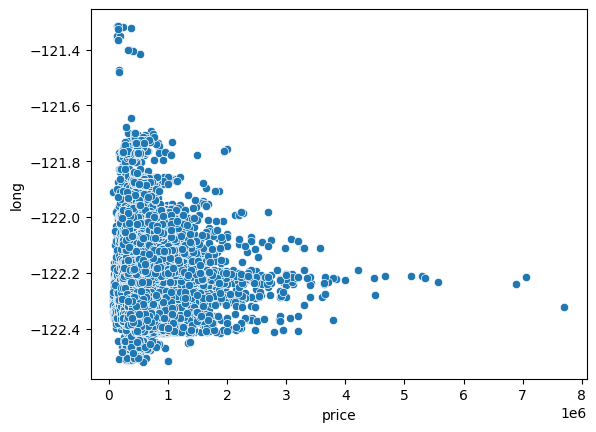

In [97]:
sns.scatterplot(data=df,x='price',y='long')

<Axes: xlabel='price', ylabel='lat'>

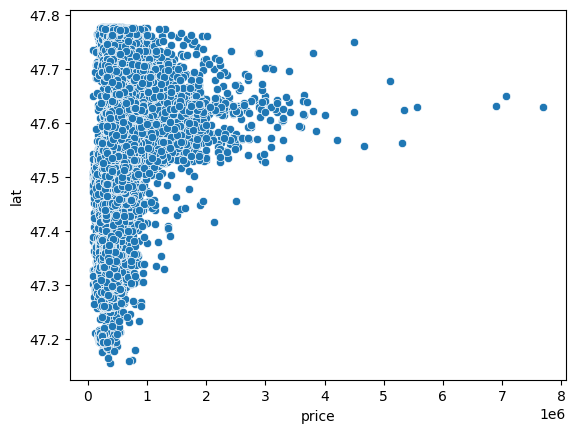

In [98]:
sns.scatterplot(data=df,x='price',y='lat')

let's see which area have so high value....

<Axes: xlabel='long', ylabel='lat'>

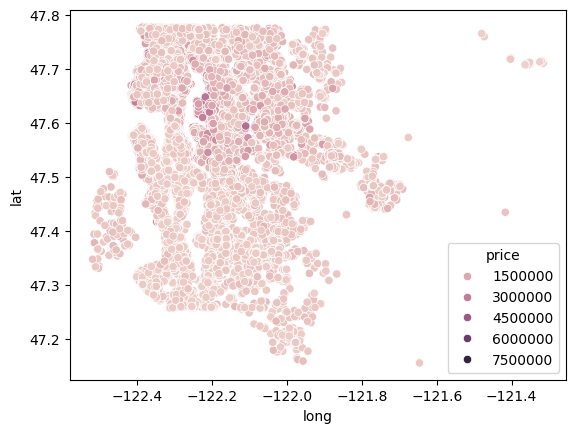

In [100]:
sns.scatterplot(data=df,x='long',y='lat',hue='price')

the above is a look like a geographical map of city whoes data we are working on. the dark point indicate posh area in this cty.

removing outlier / not needed data from our dataset. to see more deep visualization of above plot.

In [103]:
df.sort_values(by='price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [104]:
len(df)*0.01

215.97

In [105]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

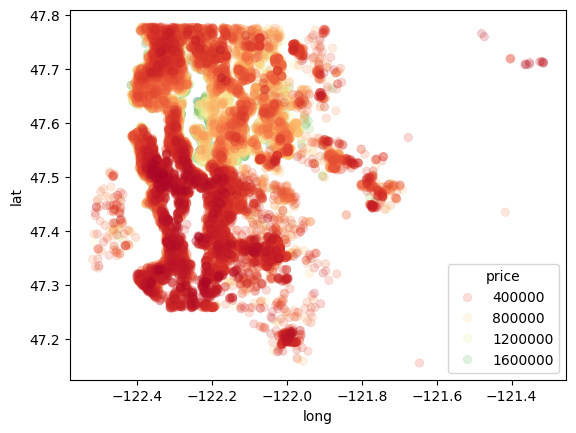

In [106]:
sns.scatterplot(data=non_top_1_perc,x='long',y='lat',hue='price',edgecolor=None,alpha=0.2,palette='RdYlGn')

effect f waterfront on price ...

<Axes: xlabel='waterfront', ylabel='price'>

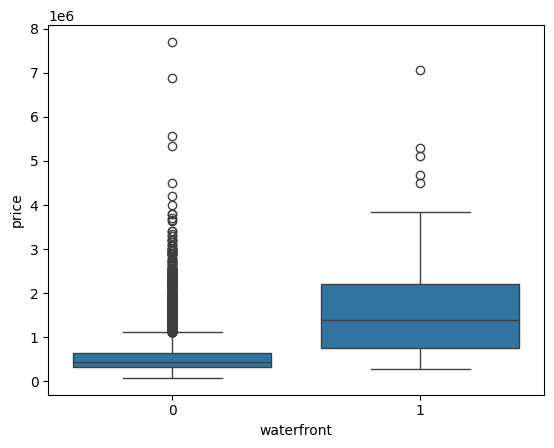

In [108]:
sns.boxplot(data=df,x='waterfront',y='price')

Part 2 :- Let's start feature engineering process , and also remove such features that unuseful.

Step 1 :- remove features who are not useful.

In [111]:
df=df.drop('id',axis=1) #id not useful in prediction of label.

Step 2 :- correct the format of such features who are in string or wrong format.

In [113]:
df['date']=pd.to_datetime(df['date'])

In [114]:
df['date'] # now we can extract month or year from date. eg :- date.month

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

Step 3 :- extract hidden features . eg :- from date , extract year or month .

In [116]:
df['month']=df['date'].apply(lambda date: date.month)
df['year']=df['date'].apply(lambda date: date.year)

In [117]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


<Axes: xlabel='month', ylabel='price'>

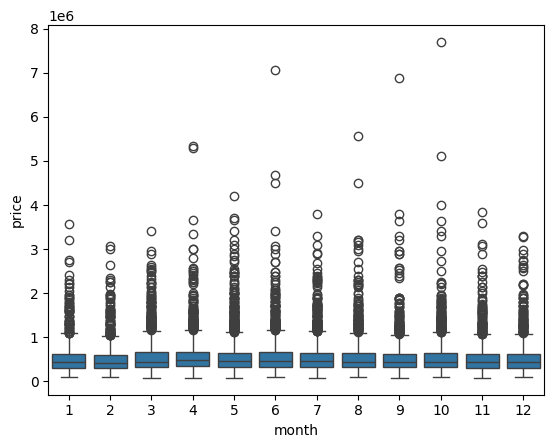

In [118]:
sns.boxplot(data=df,x='month',y='price')

In [119]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

<Axes: xlabel='month'>

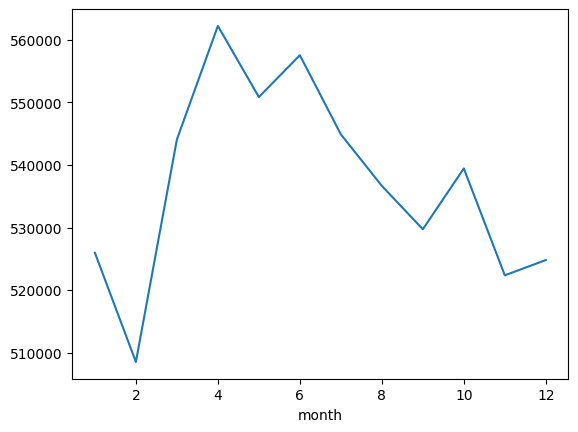

In [120]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

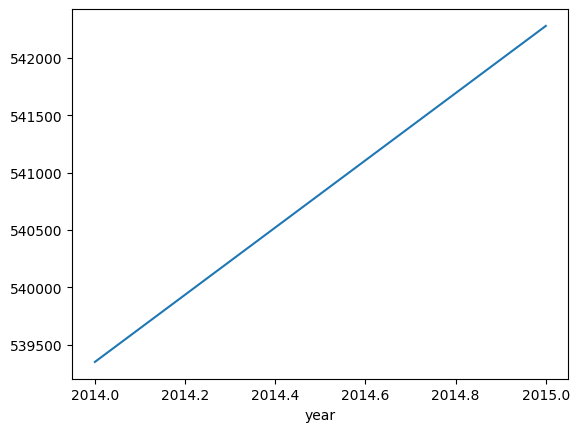

In [121]:
df.groupby('year').mean()['price'].plot()

Now date column is not useful to us.

In [123]:
df=df.drop('date',axis=1)

<Axes: xlabel='zipcode'>

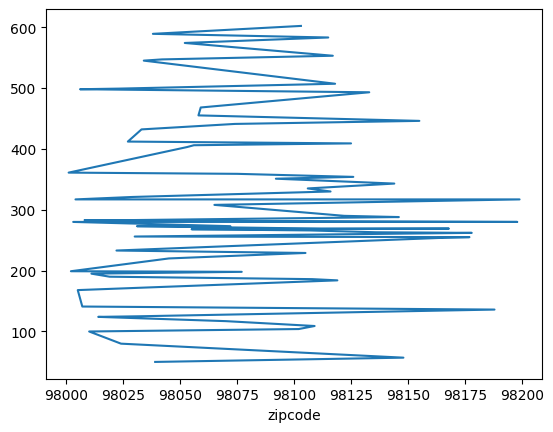

In [124]:
df['zipcode'].value_counts().plot() #it seems like zipcode never usefull .

In [125]:
df=df.drop('zipcode',axis=1)

<Axes: xlabel='sqft_basement'>

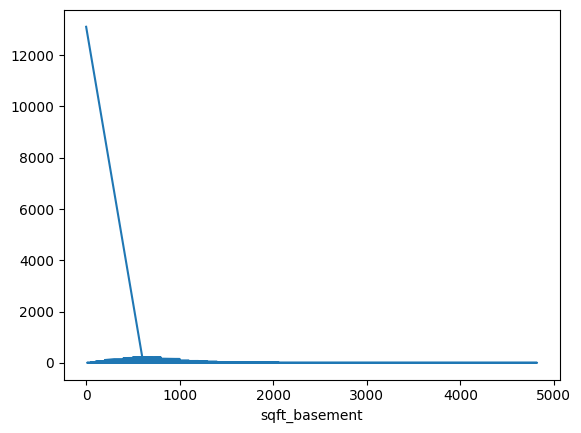

In [126]:
df['sqft_basement'].value_counts().plot()

Part 3 :- train and split our dataset and model

In [128]:
X=df.drop('price',axis=1).values #to get numpy array , tensor flow will work on numpy array
y=df['price'].values

In [139]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

Note :- That's the time to perform scaling .... without it serious impact on weigth of neural network.And to pevent leakage from dataset.

In [143]:
from sklearn.preprocessing import MinMaxScaler

In [145]:
scaler=MinMaxScaler()

In [147]:
X_train=scaler.fit_transform(X_train)

In [149]:
X_test=scaler.fit_transform(X_test)

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [153]:
X_train.shape

(15117, 19)

In [163]:
model = Sequential()  # we have 19 features so we will include 19 neurons in our layar

In [166]:
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1)) # we need single output so single nueron sufficent. 

In [168]:
model.compile(optimizer='adam',loss='mse') # becoz regression problem so select mean sequar error as loss function.

In [170]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)    #Validation data never contribute to improvement of wiegth and biase , it's only to us to see how model perform in training time quickly. 
# bcoz large dataset so we never put all data in 1 time , we opt batch machanism to pass data in small small batches so it will reduce overfitting but increass time to train. 

#epochs=400:

#Specifies the number of times the model will iterate over the entire training dataset.
#Here, the model will train for 400 complete passes through the dataset.
#A higher number of epochs allows the model to learn more, but excessive epochs can lead to overfitting.

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 425691578368.0000 - val_loss: 418928033792.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 429590577152.0000 - val_loss: 416151437312.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 422051053568.0000 - val_loss: 389710872576.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 390542491648.0000 - val_loss: 292352196608.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 250548682752.0000 - val_loss: 147652689920.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 124053536768.0000 - val_loss: 98998435840.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96496345088.0000 - val_loss: 95376990208.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 105535889408.0000 - val_loss: 93939851264.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98683412480.0000 - val_loss: 92398714880.0000
Epoch 10/400
119/119 ━━━━

Now time to see history stack of model training , to see what effect comes on validation data and is our model overfitted or not ?

In [173]:
model.history.history

{'loss': [430240890880.0,
  429404651520.0,
  417383153664.0,
  356024287232.0,
  218123714560.0,
  113842372608.0,
  98866642944.0,
  97213128704.0,
  95427182592.0,
  93495279616.0,
  91442708480.0,
  89323470848.0,
  87061454848.0,
  84610859008.0,
  82146893824.0,
  79615508480.0,
  76998778880.0,
  74214866944.0,
  71379861504.0,
  68558594048.0,
  65761619968.0,
  63100424192.0,
  60531200000.0,
  58304155648.0,
  56350298112.0,
  54664499200.0,
  53328359424.0,
  52205314048.0,
  51290673152.0,
  50459856896.0,
  49785446400.0,
  49154502656.0,
  48597475328.0,
  48077312000.0,
  47660814336.0,
  47243239424.0,
  46864515072.0,
  46478254080.0,
  46130057216.0,
  45782827008.0,
  45455302656.0,
  45171650560.0,
  44896768000.0,
  44621242368.0,
  44344512512.0,
  44090028032.0,
  43849515008.0,
  43562541056.0,
  43294683136.0,
  43053199360.0,
  42772697088.0,
  42489573376.0,
  42200256512.0,
  41901617152.0,
  41686237184.0,
  41398943744.0,
  41149444096.0,
  40861892608.0,


In [175]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302409e+11,4.189280e+11
1,4.294047e+11,4.161514e+11
2,4.173832e+11,3.897109e+11
3,3.560243e+11,2.923522e+11
4,2.181237e+11,1.476527e+11
...,...,...
395,2.995304e+10,3.416895e+10
396,2.997452e+10,3.477376e+10
397,2.995816e+10,3.542031e+10
398,2.997759e+10,3.586886e+10


In [185]:
loss=pd.DataFrame(model.history.history)

<Axes: >

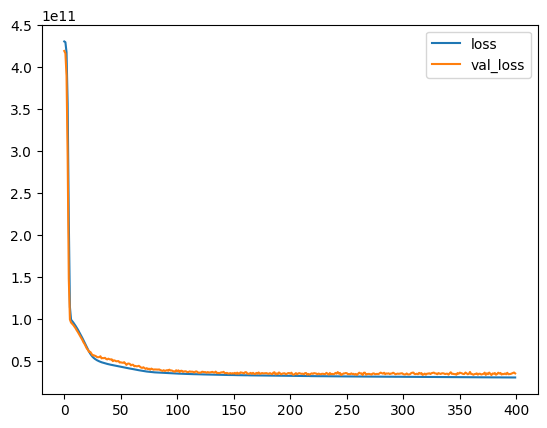

In [187]:
loss.plot()

we can see , our validation loss never increass to the end of graph , it means overfitting never achive , we still can train our model by increassing eporch.

In [190]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [192]:
predictions = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [198]:
np.sqrt(mean_squared_error(y_test,predictions))

np.float64(186503.8345008863)

In [200]:
mean_absolute_error(y_test,predictions)

np.float64(113766.44108072917)

above error good or bed :- depend on actual label 

In [203]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [205]:
 5.402966e+05


540296.6

In [207]:
#let's check variance of our model 
explained_variance_score(y_test,predictions) #1.0 is ideal

0.776287880830461

okay okay variance , we need to do more training .

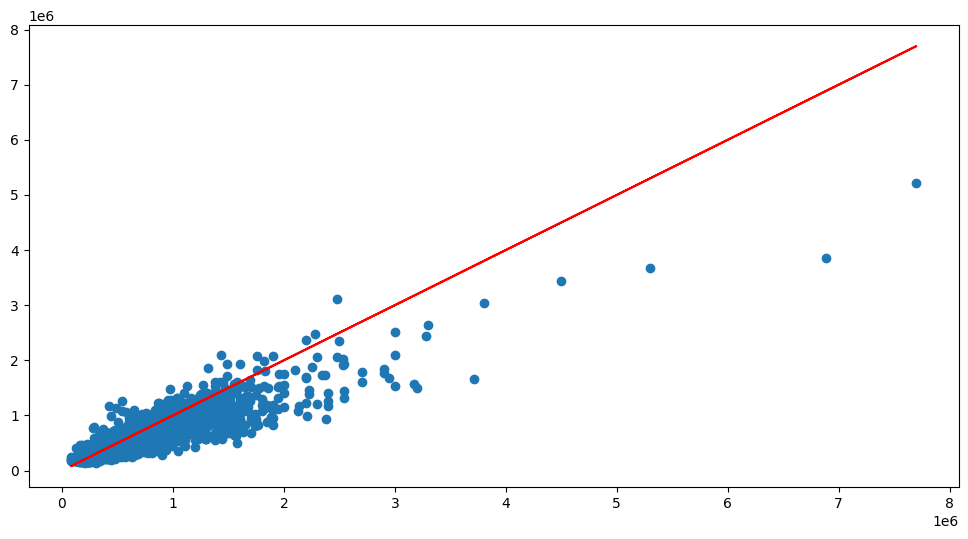

In [209]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions) #should be straight line , becoz x==y test==prediction
plt.plot(y_test,y_test,'r') #to plot ideal line 

the far point not good for ous , 0 to 2 price prediction is best usecase for our model.

so to improve our model we drop out the top price dataset (overall 1% of all dataset) and then see the mse or other things , these will improve.